In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Show all columns, nicer formatting
pd.set_option('display.max_columns', None)
pd.set_option('display.float_format', '{:.2f}'.format)

print("Libraries loaded successfully!")


Libraries loaded successfully!


In [3]:
df.head()

NameError: name 'df' is not defined

In [5]:
df=pd.read_csv("Ecommerce_Analysis/e_commerce_shopper_behaviour_and_lifestyle.csv")

In [6]:
df.head()  # show first 5 rows
df.shape  # rows x columns
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000000 entries, 0 to 999999
Data columns (total 60 columns):
 #   Column                           Non-Null Count    Dtype 
---  ------                           --------------    ----- 
 0   user_id                          1000000 non-null  int64 
 1   age                              1000000 non-null  int64 
 2   gender                           1000000 non-null  object
 3   country                          1000000 non-null  object
 4   urban_rural                      1000000 non-null  object
 5   income_level                     1000000 non-null  int64 
 6   employment_status                1000000 non-null  object
 7   education_level                  1000000 non-null  object
 8   relationship_status              1000000 non-null  object
 9   has_children                     1000000 non-null  int64 
 10  household_size                   1000000 non-null  int64 
 11  occupation                       1000000 non-null  object
 12  e

In [7]:
columns_to_use = [
    'user_id', 'age', 'gender', 'country', 'urban_rural',
    'income_level', 'employment_status', 'education_level',
    'relationship_status', 'has_children', 'weekly_purchases',
    'monthly_spend', 'average_order_value'
]

df_analysis = df[columns_to_use].copy()
df_analysis.head()


,user_id,age,gender,country,urban_rural,income_level,employment_status,education_level,relationship_status,has_children,weekly_purchases,monthly_spend,average_order_value
0,1,56,Female,Germany,Suburban,90860,Self-employed,Associate Degree,Single,0,4,2405,445
1,2,69,Male,Japan,Suburban,35423,Unemployed,Bachelor,Single,1,13,3651,179
2,3,46,Female,India,Urban,21467,Self-employed,Associate Degree,Married,1,10,2045,26
3,4,32,Male,Canada,Urban,41770,Self-employed,Bachelor,Widowed,0,16,1611,403
4,5,60,Female,Japan,Urban,183882,Employed,Associate Degree,Widowed,1,17,3476,68


In [8]:
# Total users
total_users = df_analysis.shape[0]

# % With children
percent_with_children = df_analysis['has_children'].mean() * 100

# Average income
avg_income = df_analysis['income_level'].mean()

# Average order value
avg_order_value = df_analysis['average_order_value'].mean()

# Print all KPIs
print(f"Total users: {total_users}")
print(f"Percentage with children: {percent_with_children:.2f}%")
print(f"Average income: ${avg_income:,.2f}")
print(f"Average order value: ${avg_order_value:,.2f}")


Total users: 1000000
Percentage with children: 39.94%
Average income: $104,994.57
Average order value: $255.03


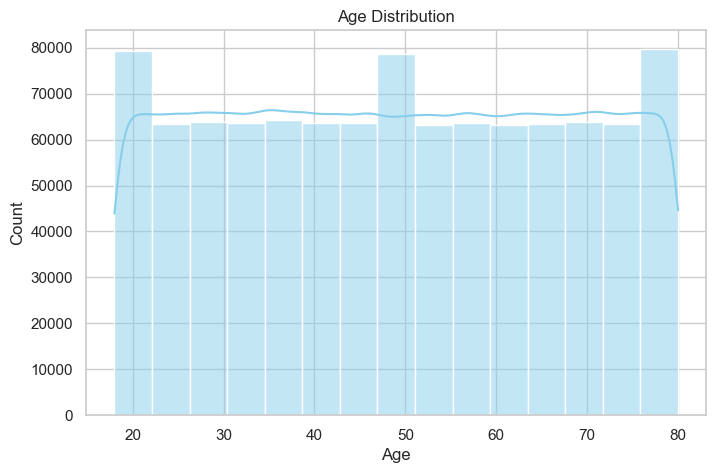

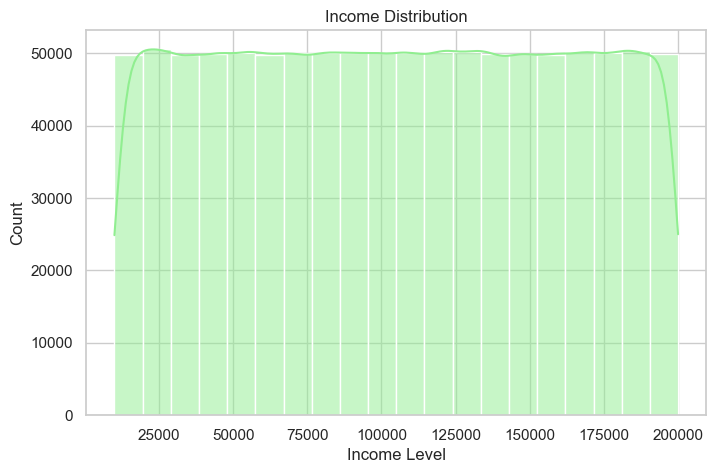

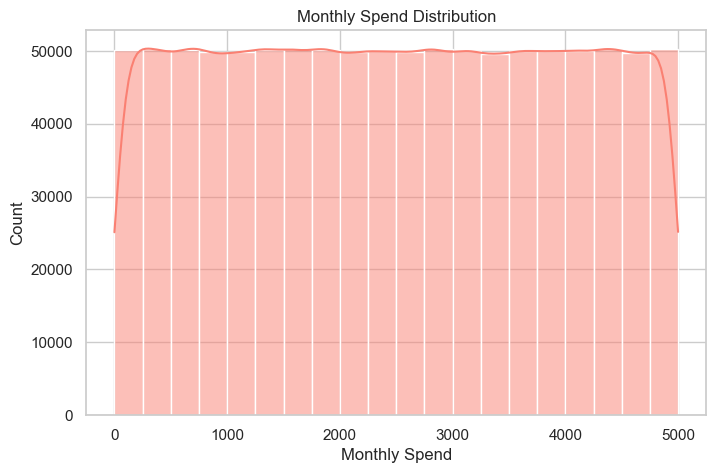

C:\Users\User\AppData\Local\Temp\ipykernel_4788\2848255169.py:30: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=df_analysis, x='gender', palette='pastel')


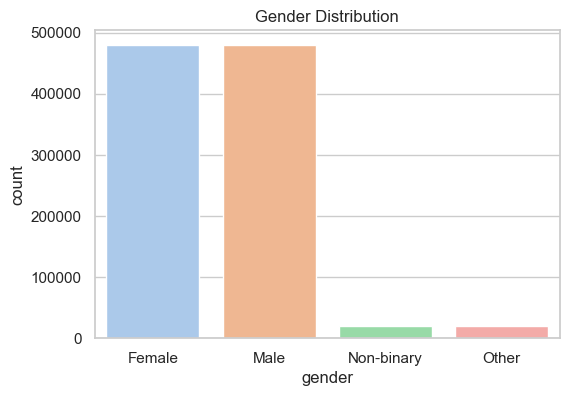

C:\Users\User\AppData\Local\Temp\ipykernel_4788\2848255169.py:37: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=df_analysis[df_analysis['country'].isin(top_countries)], x='country', palette='Set2')


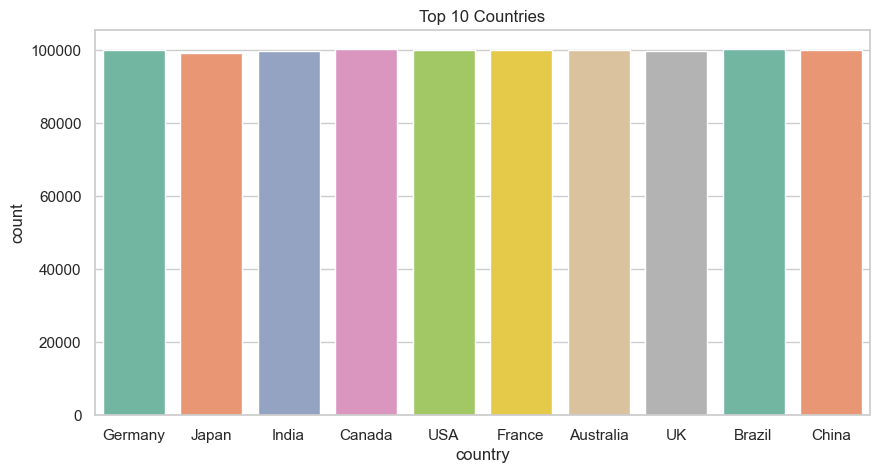

C:\Users\User\AppData\Local\Temp\ipykernel_4788\2848255169.py:43: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=df_analysis, x='urban_rural', y='has_children', palette='cool')


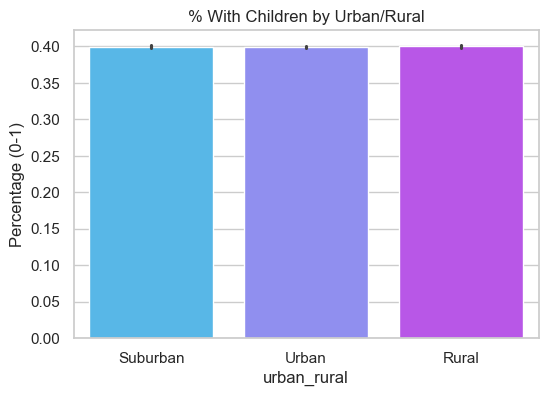

In [12]:
# Set style
sns.set(style="whitegrid")

# 1️⃣ Age distribution
plt.figure(figsize=(8,5))
sns.histplot(df_analysis['age'], bins=15, kde=True, color='skyblue')
plt.title("Age Distribution")
plt.xlabel("Age")
plt.ylabel("Count")
plt.show()

# 2️⃣ Income distribution
plt.figure(figsize=(8,5))
sns.histplot(df_analysis['income_level'], bins=20, kde=True, color='lightgreen')
plt.title("Income Distribution")
plt.xlabel("Income Level")
plt.ylabel("Count")
plt.show()

# 3️⃣ Monthly Spend distribution
plt.figure(figsize=(8,5))
sns.histplot(df_analysis['monthly_spend'], bins=20, kde=True, color='salmon')
plt.title("Monthly Spend Distribution")
plt.xlabel("Monthly Spend")
plt.ylabel("Count")
plt.show()

# 4️⃣ Gender count
plt.figure(figsize=(6,4))
sns.countplot(data=df_analysis, x='gender', palette='pastel')
plt.title("Gender Distribution")
plt.show()

# 5️⃣ Country count (top 10)
plt.figure(figsize=(10,5))
top_countries = df_analysis['country'].value_counts().nlargest(10).index
sns.countplot(data=df_analysis[df_analysis['country'].isin(top_countries)], x='country', palette='Set2')
plt.title("Top 10 Countries")
plt.show()

# 6️⃣ % with children by urban/rural
plt.figure(figsize=(6,4))
sns.barplot(data=df_analysis, x='urban_rural', y='has_children', palette='cool')
plt.title("% With Children by Urban/Rural")
plt.ylabel("Percentage (0-1)")
plt.show()


In [13]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline


In [14]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

# Example numeric + categorical input
X = df_analysis[['age', 'income_level', 'weekly_purchases', 'average_order_value']]
y = df_analysis['monthly_spend']

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Fit model
lr = LinearRegression()
lr.fit(X_train, y_train)

# Predict
y_pred = lr.predict(X_test)

# Evaluate
print("R2 score:", r2_score(y_test, y_pred))
print("RMSE:", mean_squared_error(y_test, y_pred, squared=False))


R2 score: -3.077188101086037e-05


TypeError: got an unexpected keyword argument 'squared'

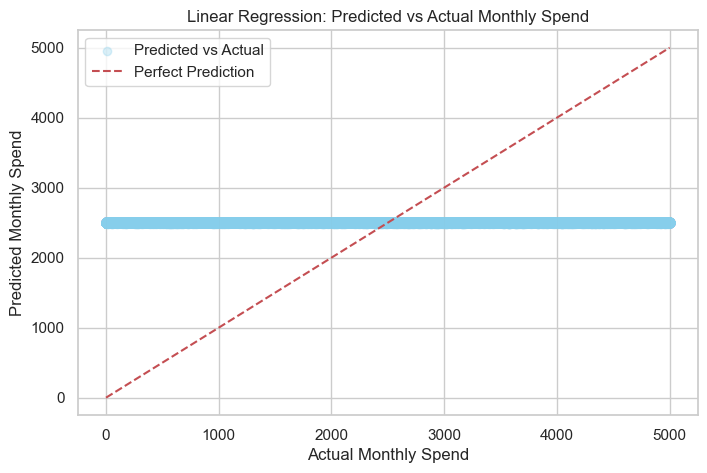

R2 score: -3.077188101086037e-05


TypeError: got an unexpected keyword argument 'squared'

In [17]:
# ===== Step 1: Import libraries =====
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import StandardScaler
import numpy as np

sns.set(style="whitegrid")

# ===== Step 2: Select features and target =====
X = df_analysis[['age', 'income_level', 'weekly_purchases', 'average_order_value']]
y = df_analysis['monthly_spend']

# ===== Step 3: Train-test split =====
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)

# ===== Step 4: Scale numeric features =====
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# ===== Step 5: Fit Linear Regression =====
lr = LinearRegression()
lr.fit(X_train_scaled, y_train)
y_pred = lr.predict(X_test_scaled)

# ===== Step 6: Plot scatter + regression line =====
plt.figure(figsize=(8,5))
plt.scatter(y_test, y_pred, alpha=0.3, color='skyblue', label='Predicted vs Actual')

# Add regression line (y = x for perfect prediction)
lims = [y_test.min(), y_test.max()]
plt.plot(lims, lims, 'r--', label='Perfect Prediction')
plt.xlabel("Actual Monthly Spend")
plt.ylabel("Predicted Monthly Spend")
plt.title("Linear Regression: Predicted vs Actual Monthly Spend")
plt.legend()
plt.show()

# ===== Step 7: Evaluate model =====
from sklearn.metrics import mean_squared_error, r2_score

print("R2 score:", r2_score(y_test, y_pred))
print("RMSE:", mean_squared_error(y_test, y_pred, squared=False))


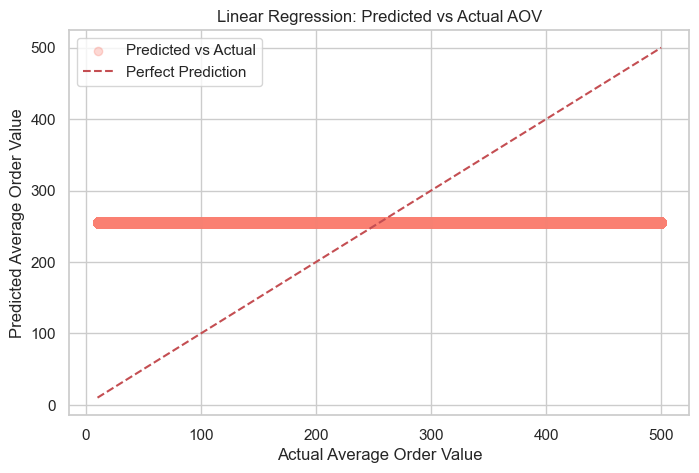

R2 score: -1.0199178586578483e-05


In [18]:
# ===== Predict Average Order Value =====
X = df_analysis[['age', 'income_level', 'weekly_purchases', 'monthly_spend']]
y = df_analysis['average_order_value']

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)

# Scale features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Fit Linear Regression
lr_aov = LinearRegression()
lr_aov.fit(X_train_scaled, y_train)
y_pred_aov = lr_aov.predict(X_test_scaled)

# Scatter plot + perfect prediction line
plt.figure(figsize=(8,5))
plt.scatter(y_test, y_pred_aov, alpha=0.3, color='salmon', label='Predicted vs Actual')
lims = [y_test.min(), y_test.max()]
plt.plot(lims, lims, 'r--', label='Perfect Prediction')
plt.xlabel("Actual Average Order Value")
plt.ylabel("Predicted Average Order Value")
plt.title("Linear Regression: Predicted vs Actual AOV")
plt.legend()
plt.show()

# Evaluate
print("R2 score:", r2_score(y_test, y_pred_aov))
#print("RMSE:", mean_squared_error(y_test, y_pred_aov, squared=False))


Accuracy: 0.60128
Confusion Matrix:
 [[120256      0]
 [ 79744      0]]


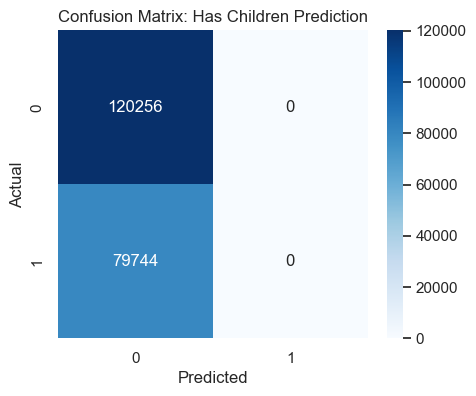

In [19]:
# ===== Predict Has Children =====
X = df_analysis[['age', 'income_level', 'relationship_status', 'urban_rural']]
X = pd.get_dummies(X, drop_first=True)  # encode categorical
y = df_analysis['has_children']

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)

# Fit Logistic Regression
from sklearn.linear_model import LogisticRegression
clf = LogisticRegression(max_iter=1000)
clf.fit(X_train, y_train)
y_pred = clf.predict(X_test)

# Accuracy & confusion matrix
from sklearn.metrics import accuracy_score, confusion_matrix
print("Accuracy:", accuracy_score(y_test, y_pred))
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred))

# Optional: Plot confusion matrix
import seaborn as sns
plt.figure(figsize=(5,4))
sns.heatmap(confusion_matrix(y_test, y_pred), annot=True, fmt='d', cmap='Blues')
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Confusion Matrix: Has Children Prediction")
plt.show()


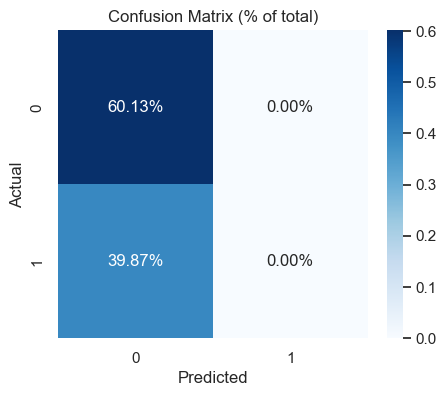

Accuracy: 0.60128


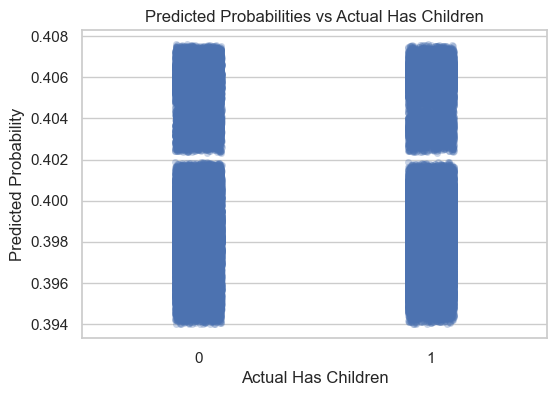

In [20]:
# ===== Step 1: Import Libraries =====
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix, accuracy_score

sns.set(style="whitegrid")

# ===== Step 2: Select features & target =====
X = df_analysis[['age', 'income_level', 'relationship_status', 'urban_rural']]
X = pd.get_dummies(X, drop_first=True)  # encode categorical features
y = df_analysis['has_children']

# ===== Step 3: Train-test split =====
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)

# ===== Step 4: Fit Logistic Regression =====
clf = LogisticRegression(max_iter=1000)
clf.fit(X_train, y_train)

# ===== Step 5: Predictions =====
y_pred = clf.predict(X_test)
y_prob = clf.predict_proba(X_test)[:,1]  # predicted probability of having children

# ===== Step 6: Confusion Matrix (Percentages) =====
cm = confusion_matrix(y_test, y_pred)
cm_percent = cm / cm.sum()  # convert to percentages

plt.figure(figsize=(5,4))
sns.heatmap(cm_percent, annot=True, fmt=".2%", cmap="Blues")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Confusion Matrix (% of total)")
plt.show()

print("Accuracy:", accuracy_score(y_test, y_pred))

# ===== Step 7: Strip Plot of Predictions =====
df_test = X_test.copy()
df_test['Actual'] = y_test.values
df_test['Predicted'] = y_pred
df_test['Probability'] = y_prob

plt.figure(figsize=(6,4))
sns.stripplot(x='Actual', y='Probability', data=df_test, jitter=True, alpha=0.3)
plt.xlabel("Actual Has Children")
plt.ylabel("Predicted Probability")
plt.title("Predicted Probabilities vs Actual Has Children")
plt.show()


C:\Users\User\Documents\Anaconda\Lib\site-packages\IPython\core\pylabtools.py:170: UserWarning: Creating legend with loc="best" can be slow with large amounts of data.
  fig.canvas.print_figure(bytes_io, **kw)


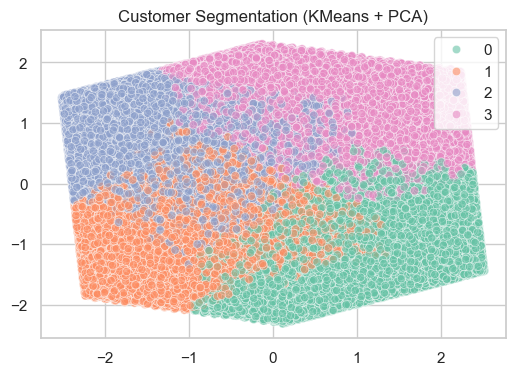

In [21]:
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA

X_cluster = df_analysis[['monthly_spend','average_order_value','weekly_purchases']]
X_scaled = StandardScaler().fit_transform(X_cluster)

kmeans = KMeans(n_clusters=4, random_state=42)
labels = kmeans.fit_predict(X_scaled)

pca = PCA(n_components=2)
X_pca = pca.fit_transform(X_scaled)

plt.figure(figsize=(6,4))
sns.scatterplot(x=X_pca[:,0], y=X_pca[:,1], hue=labels, palette='Set2', alpha=0.6)
plt.title("Customer Segmentation (KMeans + PCA)")
plt.show()
